## 1. dataset preparation

#### 1.1 AllTransHPI

AllTransHPI@1(https://fred.stlouisfed.org/series/ATNHPIUS47260Q) and AllTransHPI@2(https://alfred.stlouisfed.org/series?seid=ATNHPIUS47260Q&utm_source=series_page&utm_medium=related_content&utm_term=related_resources&utm_campaign=alfred) both use 1995:Q1 as a base of 100 units. While AllTransHPI@2 contains two observation time stamp, resulting a slightly different in value.

We check whether AllTransHPI@0 (https://fred.stlouisfed.org/series/VASTHPI) is consistent with AllTransHPI@1  using the same base. Unfortunately the answer is not. Also we have observed missing data in AllTransHPI@1. So, finally, we determine to use AllTransHPI@0.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

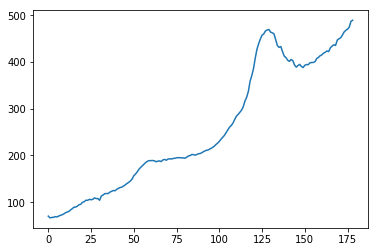

In [3]:
lines = open('/content/drive/My Drive/Colab Notebooks/VASTHPI.csv').readlines()[1:]
data = [float(l.strip().split(',')[1])
       for l in lines]
plt.plot(data)

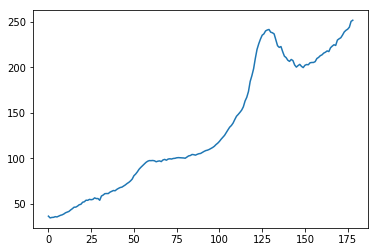

In [4]:
data = np.array(data)

for i, l in enumerate(lines):
    if '1995-01-01' in l:
        break
        
        
data *= 100. / data[i]

plt.plot(data)

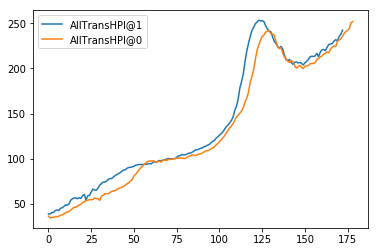

In [5]:
lines = open('/content/drive/My Drive/Colab Notebooks/ATNHPIUS47260Q.csv').readlines()[1:]
lines = [l.strip().split(',')[1]
        for l in lines]
HPI = [float(l) if l != '.' else 0
      for l in lines]

HPI = np.array(HPI)
HPI[HPI == 0] = data[np.argwhere(HPI==0).flatten()]
plt.plot(HPI)
plt.plot(data)
plt.legend(['AllTransHPI@1', 'AllTransHPI@0'])

In [0]:
HPI = data

#data preprocessing

In [10]:
import pandas as pd

df = pd.Series(HPI)
print(df.isnull)

<bound method Series.isnull of 0       36.209117
1       34.277620
2       34.797837
3       34.926603
4       35.663147
5       35.364409
6       36.291527
7       37.100180
8       37.651301
9       38.588720
10      39.933041
11      40.741695
12      41.426732
13      43.044038
14      44.424414
15      46.072624
16      46.160185
17      47.246974
18      48.771568
19      49.291785
20      51.506567
21      52.067989
22      53.778007
23      53.664692
24      54.689673
25      54.318826
26      54.689673
27      56.337883
28      55.580737
29      55.601339
          ...    
149    199.809426
150    202.317796
151    203.183106
152    202.925573
153    205.093999
154    205.439093
155    205.444244
156    206.381664
157    209.801700
158    211.048159
159    212.917847
160    213.860417
161    215.766160
162    216.724182
163    218.181818
164    217.465877
165    221.673963
166    223.471543
167    224.980685
168    224.208087
169    230.069534
170    231.522019
171    232.6860

#### 1.2 Two supplement datasets

Also we have collected two more datasets: YAURN (https://fred.stlouisfed.org/series/VAURN), which records the unemployment rate of Virginia from 1976; and STTMINWGVA (https://fred.stlouisfed.org/series/STTMINWGVA), which records the State Minimum Wage Rate for Virginia from 1976.

In [0]:
# the data records 1976-01-01 to 2019-10-01 every month, however, HPI is every 3 months from 1975-01-01 to 2019-04-01
# so we average the unemployment record every 3 months to 2019-06-01
unemploy = [float(line.strip().split(',')[1])
            for line in open('/content/drive/My Drive/Colab Notebooks/VAURN.csv').readlines()[1:]]
unemploy = unemploy[:-4]
unemploy = [(unemploy[i] + unemploy[i+1] + unemploy[i+2]) / 3. for i in range(0, len(unemploy), 3)]

In [0]:
# the data records 1976-01-01 to 2019-10-01 every year
# so we duplicate the data four times every year
basewage = [float(line.strip().split(',')[1])
            for line in open('/content/drive/My Drive/Colab Notebooks/STTMINWGVA.csv').readlines()[1:]]
basewage = [basewage[int(i/4)] for i in range(4*len(basewage))]
basewage = basewage[:-2]

In [21]:
df2 = pd.Series(unemploy)
print(df2.isnull)
df3 = pd.Series(basewage)
print(df3.isnull)

<bound method Series.isnull of 0      6.633333
1      5.533333
2      5.833333
3      5.433333
4      6.433333
5      5.233333
6      5.166667
7      5.000000
8      5.933333
9      5.133333
10     5.233333
11     4.866667
12     5.533333
13     4.666667
14     4.566667
15     4.266667
16     4.966667
17     5.366667
18     5.466667
19     4.833333
20     6.066667
21     5.800000
22     5.800000
23     6.366667
24     7.666667
25     7.166667
26     7.233333
27     7.666667
28     8.100000
29     6.600000
         ...   
144    6.466667
145    6.000000
146    6.133333
147    5.533333
148    6.066667
149    5.666667
150    5.766667
151    5.366667
152    5.666667
153    5.166667
154    5.366667
155    4.733333
156    5.000000
157    4.500000
158    4.333333
159    3.933333
160    4.200000
161    3.933333
162    4.300000
163    3.933333
164    4.166667
165    3.633333
166    3.733333
167    3.266667
168    3.400000
169    2.900000
170    2.966667
171    2.600000
172    3.133333
173    2.

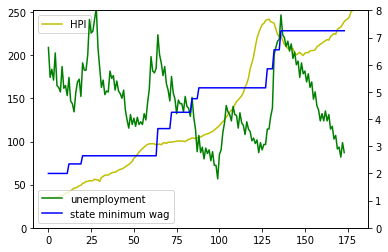

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(HPI, 'y', label = 'HPI')
ax2 = ax.twinx()
ax2.plot(unemploy, 'g', label = 'unemployment')
ax2.plot(basewage, 'b', label = 'state minimum wag')
ax.legend(loc=0)
ax.set_ylim(0, int(max(HPI))+1)
ax2.legend(loc=0)
ax2.set_ylim(0, int(max(basewage))+1)
plt.show()

## 2. Moving Averege

methods: simple moving average *and* exponential average moving

evaluations: RMSE (root of mean sqaure error) *and* the accuracy to predict up/down tendency

In [0]:
def move_ave(x, window=3):
    y = []
    for i in range(window, len(x)):
        y.append(np.mean(x[i-window:i]))
        
    return np.array(y)

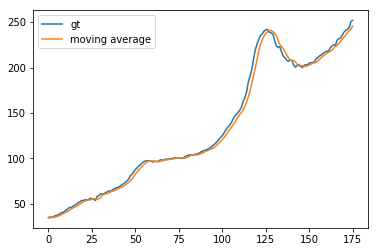

In [0]:
window = 3
y = move_ave(HPI, window=window)
plt.plot(HPI[window:])
plt.plot(y)
plt.legend(['gt', 'moving average'])

In [0]:
rmse = np.sqrt((np.mean(HPI[window:] - y)**2))
print rmse

2.4478300907608155


In [0]:
tendency = (HPI[window+1:] - HPI[window:-1]) > 0.
predict_tendency = (y[1:] - y[:-1]) > 0.
acc = np.mean(tendency == predict_tendency)
print acc

0.8171428571428572


In [0]:
for window in range(1, 10):
    y = move_ave(HPI, window=window)
    rmse = np.sqrt(np.mean((HPI[window:] - y)**2))
    
    tendency = (HPI[window+1:] - HPI[window:-1]) > 0.
    predict_tendency = (y[1:] - y[:-1]) > 0.
    acc = np.mean(tendency == predict_tendency)
    
    print window, '&', rmse, '&', acc, '\\\\'

1 & 2.708211915129222 & 0.7570621468926554 \\
2 & 3.828704039857782 & 0.7954545454545454 \\
3 & 4.94246813741392 & 0.8171428571428572 \\
4 & 6.067002048996756 & 0.8275862068965517 \\
5 & 7.204293842032414 & 0.7976878612716763 \\
6 & 8.330350368220445 & 0.8197674418604651 \\
7 & 9.436799555686378 & 0.8128654970760234 \\
8 & 10.52369276179445 & 0.8117647058823529 \\
9 & 11.58840919981427 & 0.8165680473372781 \\


In [0]:
def exp_move_ave(x, window=3, alpha=0.7):
    y = []
    for i in range(window, len(x)):
        result = x[i-window]
        for j in range(window-1, 1, -1):
            result = (1-alpha) * result + alpha * x[i-j]
        y.append(result)
        
    return np.array(y)

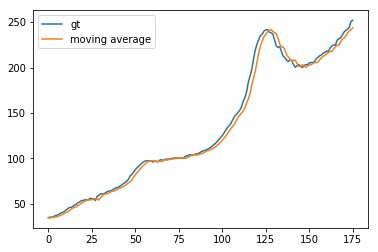

In [0]:
window = 3
y = exp_move_ave(HPI, window=window)
plt.plot(HPI[window:])
plt.plot(y)
plt.legend(['gt', 'moving average'])

In [0]:
rmse = np.sqrt(np.mean(HPI[window:] - y)**2)
print rmse

2.8183427762039672


In [0]:
for alpha in [.55, .6, .65, .7, .75, .8, .85, .9, .95]:
    window = 4
    y = exp_move_ave(HPI, window=window, alpha=alpha)
    rmse = np.sqrt(np.mean((HPI[window:] - y)**2))
    
    tendency = (HPI[window+1:] - HPI[window:-1]) > 0.
    predict_tendency = (y[1:] - y[:-1]) > 0.
    acc = np.mean(tendency == predict_tendency)
    
    print alpha, '&', rmse, '&', acc, '\\\\'

0.55 & 6.477685021485047 & 0.7873563218390804 \\
0.6 & 6.275072958813033 & 0.7816091954022989 \\
0.65 & 6.0850007261320895 & 0.7701149425287356 \\
0.7 & 5.907308986554374 & 0.7471264367816092 \\
0.75 & 5.741831796846328 & 0.7471264367816092 \\
0.8 & 5.588399207808664 & 0.735632183908046 \\
0.85 & 5.446840439738827 & 0.7241379310344828 \\
0.9 & 5.316987603724413 & 0.7241379310344828 \\
0.95 & 5.19867990317411 & 0.7241379310344828 \\


## 3. regression tree

In [0]:

import numpy as np

class node():
    def __init__(self, d = -1, theta = -1):
        self.d = d
        self.theta = theta
        self.left = None
        self.right = None
        self.label = None

class RegressionTree(object):
    def __init__(self, nfeatures, max_depth):
        self.num_input_features = nfeatures
        self.max_depth = max_depth
        
    def fit(self, X, y):
        """ Fit the model.
                Args:
                X: A of floats with shape [num_examples, num_features].
                y: An array of floats with shape [num_examples].
                max_depth: An int representing the maximum depth of the tree
        """
        def _fit(X, y, depth):
            if len(y) == 1 or np.std(y) == 0:
                tree_node = node()
                tree_node.label = y[0]
                return tree_node
        
            if depth == self.max_depth:
                tree_node = node()
                tree_node.label = np.mean(y)
                return tree_node
            
            SSE_best = None
            d = 0 
            theta = X[0,d]
            for _d in range(self.num_input_features):
                for _theta in np.unique(X[:,_d]):
                    y_l = y[X[:,_d] < _theta]
                    y_r = y[X[:,_d] >=_theta]
                    mu_l = np.mean(y_l)
                    mu_r = np.mean(y_r)
                    SSE = np.sum((y_l - mu_l)**2) + np.sum((y_r - mu_r)**2)
                    if SSE_best is None:
                        SSE_best = SSE
                        d = _d
                        theta = _theta
                    elif SSE < SSE_best:
                        SSE_best = SSE
                        d = _d
                        theta = _theta
                        
            X_l = X[X[:,d] < theta, :]
            X_r = X[X[:,d] >=theta, :]
            y_l = y[X[:,d] < theta]
            y_r = y[X[:,d] >=theta]
            
            tree_node = node(d, theta)
            tree_node.left  = _fit(X_l, y_l, depth=depth+1)
            tree_node.right = _fit(X_r, y_r, depth=depth+1)
            
            return tree_node
            
        self.node = _fit(X, y, depth=0)

    def predict(self, X):
        """ Predict.
        Args:
                X: A  matrix of floats with shape [num_examples, num_features].

        Returns:
                An array of floats with shape [num_examples].
        """
        def _predict(node, x):
            if node.label is not None:
                return node.label
            elif x[node.d] < node.theta:
                return _predict(node.left, x)
            else:
                return _predict(node.right, x)
            
        prediction = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            node = self.node
            prediction[i] = _predict(node, X[i,:])
        
        return prediction


class GradientBoostedRegressionTree(object):
    def __init__(self, nfeatures, max_depth, n_estimators, regularization_parameter):
        self.num_input_features = nfeatures
        self.max_depth = max_depth
        self.n_estimators = n_estimators
        self.regularization_parameter = regularization_parameter
        
    def fit(self, X, y):
        """ Fit the model.
                Args:
                X: A of floats with shape [num_examples, num_features].
                y: An array of floats with shape [num_examples].
                max_depth: An int representing the maximum depth of the tree
                n_estimators: An int representing the number of regression trees to iteratively fit
        """
        F0 = RegressionTree(self.num_input_features, 0) # F0 returns mean(y)
        F0.fit(X=X, y=y)
        self.F = [F0] 
        g = np.copy(y)
        for i in range(self.n_estimators):
            if i == 0:
                g -= self.F[-1].predict(X)
            else:
                g -= self.regularization_parameter * self.F[-1].predict(X)
            tree = RegressionTree(self.num_input_features, self.max_depth)
            tree.fit(X=X, y=g)
            self.F.append(tree)

    def predict(self, X):
        """ Predict.
        Args:
                X: A  matrix of floats with shape [num_examples, num_features].

        Returns:
                An array of floats with shape [num_examples].
        """
        predictions = np.zeros((X.shape[0], 1+self.n_estimators))
        for j in range(self.n_estimators+1):
            predictions[:,j] = self.F[j].predict(X)
        prediction = predictions[:,0] + self.regularization_parameter * np.sum(predictions[:,1:], axis=1)

        return prediction


In [0]:
print(len(y))
print(len(unemploy))
print(len(basewage))
print(len(HPI))

175
174
174
179


In [30]:
x = []
y = HPI[5:] # from 1976-01-01 to present
for i in range(len(y)):
    x.append([HPI[i], HPI[i+1], HPI[i+2], HPI[i+3],  # history window size = 4
           unemploy[i], basewage[i]                 # two more features
            ])

x = np.array(x)
y = np.array(y)
print x.shape, y.shape

(174, 6) (174,)


In [28]:
dataset = pd.DataFrame(x,columns=['HPI1', 'HPI2','HPI3','HPI4','unemploy', 'basewage'])
dataset.describe()

,HPI1,HPI2,HPI3,HPI4,unemploy,basewage
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,128.717516,129.893642,131.087884,132.291983,4.707088,4.538506
std,67.663469,67.824579,67.960556,68.100559,1.312651,1.858377
min,34.277620,34.277620,34.797837,34.926603,1.800000,2.000000
25%,68.480556,69.684522,71.013392,72.467165,3.775000,2.650000
50%,104.210662,104.638166,105.127479,105.830543,4.633333,4.750000
75%,204.661344,205.352820,205.442956,206.147309,5.600000,5.850000
max,241.776977,241.776977,242.075715,244.311100,8.100000,7.250000


In [0]:
shuffle_ind = np.random.permutation(len(y))
ratio = 0.7
ratio = int(ratio * len(y))
x_train = x[shuffle_ind[:ratio], :]
y_train = y[shuffle_ind[:ratio]]
x_test = x[shuffle_ind[ratio:], :]
y_test = y[shuffle_ind[ratio:]]

In [0]:
print(str(len(x_train))+', '+str(len(y_train)))
print(str(len(x_test))+', '+str(len(y_test)))

121, 121
53, 53


In [0]:
regTree = RegressionTree(nfeatures=6, max_depth=5)
regTree.fit(x_train,y_train)
z = regTree.predict(x_test)
rmse = np.sqrt(np.mean((z - y_test)**2))

y_cat = list(y_train) + list(z)
y_fullback = np.array([0 for _ in range(len(y))])
for i in range(len(y)):
    idx = np.argwhere(shuffle_ind == i).flatten()[0]
    y_fullback[i] = y_cat[idx]
    
tendency = (y[1:] - y[:-1]) >= 0.
predict_tendency = (y_fullback[1:] - y_fullback[:-1]) >= 0.
acc = np.mean(tendency == predict_tendency)

print 'regression tree: RMSE =', rmse, '; tendency acc =', acc

regression tree: RMSE = 6.575425689531721 ; tendency acc = 0.7861271676300579


Text(0.5,1,'regression tree')

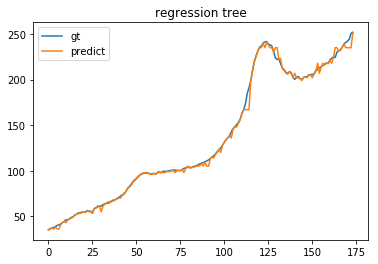

In [0]:
plt.plot(y)
plt.plot(y_fullback)
plt.legend(['gt', 'predict'])
plt.title('regression tree')

In [0]:
gbTree = GradientBoostedRegressionTree(nfeatures=6, max_depth=5, n_estimators=20, regularization_parameter=1.)

gbTree = RegressionTree(nfeatures=6, max_depth=10)
gbTree.fit(x_train,y_train)
z = gbTree.predict(x_test)
rmse = np.sqrt(np.mean((z - y_test)**2))

y_cat = list(y_train) + list(z)
y_fullback = np.array([0 for _ in range(len(y))])
for i in range(len(y)):
    idx = np.argwhere(shuffle_ind == i).flatten()[0]
    y_fullback[i] = y_cat[idx]
    
tendency = (y[1:] - y[:-1]) >= 0.
predict_tendency = (y_fullback[1:] - y_fullback[:-1]) >= 0.
acc = np.mean(tendency == predict_tendency)

print 'gradient boosting tree: RMSE =', rmse, '; tendency acc =', acc

gradient boosting tree: RMSE = 5.7423597946162 ; tendency acc = 0.815028901734104


Text(0.5,1,'gradient boosting tree')

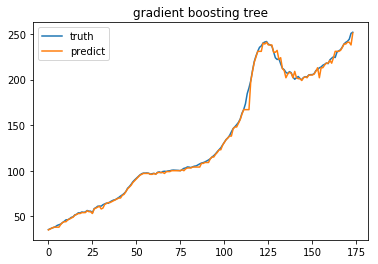

In [0]:
plt.plot(y)
plt.plot(y_fullback)
plt.legend(['truth', 'predict'])
plt.title('gradient boosting tree')

# 4. SVR Regression

In [0]:
from sklearn import svm
from scipy.stats import reciprocal, uniform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

parameter_distributions = {'C':[0.001,0.005, 0.01,0.05, 0.1, 1,5,], 
                           'gamma':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
                           'kernel': ['rbf',]},

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train.astype(int))
X_test_scaled = scaler.transform(x_test.astype(int))

In [76]:
y_train = y_train.astype(np.float)
y_train.dtype

dtype('float64')

In [77]:
regression = svm.SVR()

rbf_grid_search = GridSearchCV(regression, param_grid=parameter_distributions,verbose=1, cv = 5, n_jobs=-1)
rbf_grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:    0.7s finished
/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=({'kernel': ['rbf'], 'C': [0.001, 0.005, 0.01, 0.05, 0.1, 1, 5], 'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]},),
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [78]:
rbf_grid_search.best_estimator_

SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [79]:
rbf_grid_search.best_score_

0.9649969406899495

In [80]:
from sklearn.metrics import mean_squared_error

y_pred = rbf_grid_search.predict(X_test_scaled)
MSE = mean_squared_error(y_pred, y_test)
print(np.sqrt(MSE))


10.30647004166043


In [0]:
y_cat = list(y_train) + list(y_pred)
y_fullback = np.array([0 for _ in range(len(y))])
for i in range(len(y)):
    idx = np.argwhere(shuffle_ind == i).flatten()[0]
    y_fullback[i] = y_cat[idx]


In [0]:
tendency = (y[1:] - y[:-1]) >= 0.
predict_tendency = (y_fullback[1:] - y_fullback[:-1]) >= 0.
acc = np.mean(tendency == predict_tendency)


In [83]:
print(acc)

0.7456647398843931


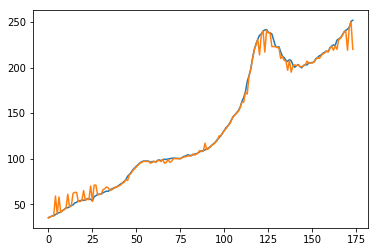

In [84]:
plt.plot(y)
plt.plot(y_fullback)